# Importando Dependências

In [338]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

# importando arquivo
df = pd.read_csv('./train.csv')
df

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,NaN,2,266,0,3,1,0,0,2,...,1,4,0,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,...,1,2,0,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4
14990,2,Monkies,2,265,266,3,5,6,7,3,...,1,5,30,41326,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3
14991,2,Ms Daym,9,266,0,2,4,7,0,1,...,1,1,0,41336,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4


# 

# Comparando **Velocidade de Adoção** e **Porte**
0. Não especificado
1. Pequeno
2. Médio    
3. Grande
4. Muito Grande 

<BarContainer object of 4 artists>

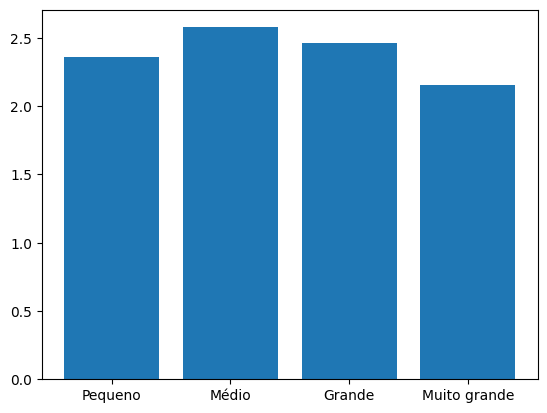

In [305]:
adoption_by_maturity_size = df[["AdoptionSpeed", "MaturitySize"]].groupby("MaturitySize").mean()
plt.bar(["Pequeno", "Médio", "Grande", "Muito grande"], adoption_by_maturity_size["AdoptionSpeed"])

# Comparando **Velocidade de Adoção** e **Idade**

Age    10804
dtype: int64


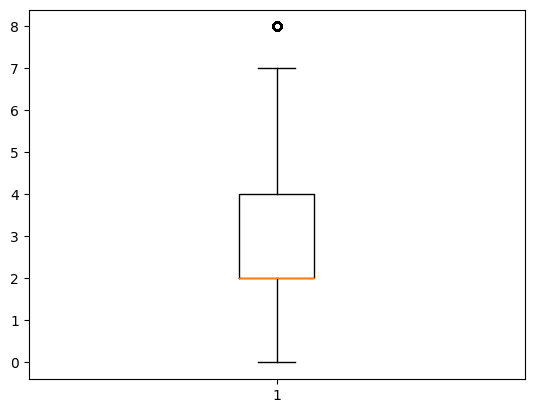

In [323]:
age = df[["Age"]]
age = age.query("Age <= 8")
plt.boxplot(age)
print(age.count())

<BarContainer object of 5 artists>

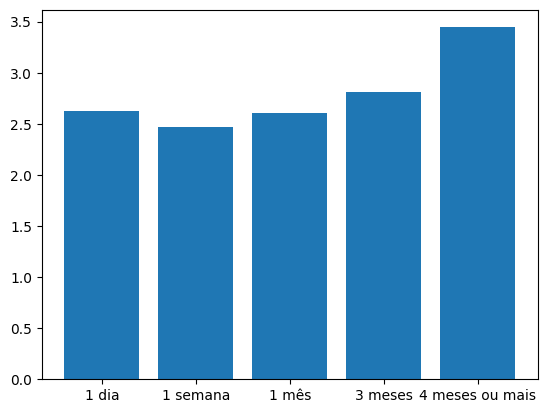

In [324]:
age = df[["AdoptionSpeed", "Age"]].query("Age <= 8").groupby("AdoptionSpeed").mean()
age
plt.bar(["1 dia", "1 semana", "1 mês", "3 meses", "4 meses ou mais"], age["Age"])

# Comparando velocidade de adoção e o tipo do animal

<BarContainer object of 2 artists>

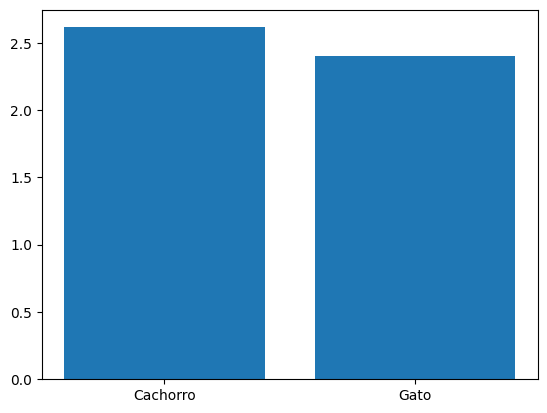

In [303]:
adoption_by_type = df[["Type", "AdoptionSpeed"]].groupby("Type").mean()
plt.bar(["Cachorro", "Gato"], adoption_by_type["AdoptionSpeed"])

# Comparando **Velocidade de Adoção** e **Vacinação**

<BarContainer object of 3 artists>

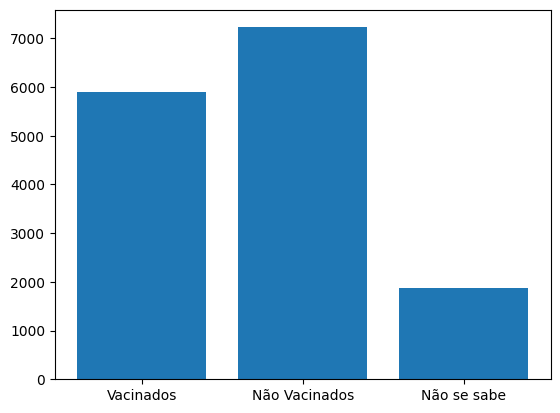

In [337]:
categorias_vacinacao = df[["Vaccinated", "AdoptionSpeed"]].groupby("Vaccinated").count()
plt.bar(["Vacinados", "Não Vacinados", "Não se sabe"], categorias_vacinacao["AdoptionSpeed"])

<BarContainer object of 3 artists>

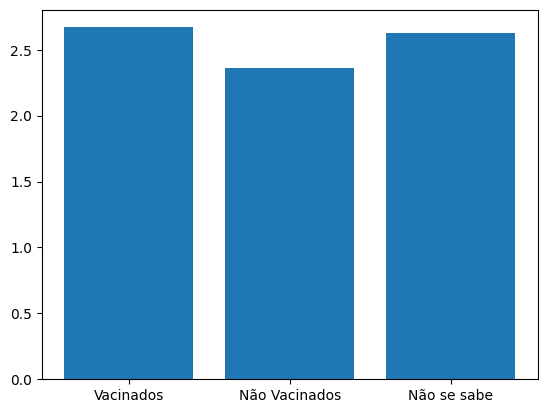

In [372]:
adocao_por_vacinacao = df[["Vaccinated", "AdoptionSpeed"]].groupby("Vaccinated").mean()
plt.bar(["Vacinados", "Não Vacinados", "Não se sabe"], adocao_por_vacinacao["AdoptionSpeed"])

# Comparando **Velocidade de Adoção** e **Saúde**

<BarContainer object of 3 artists>

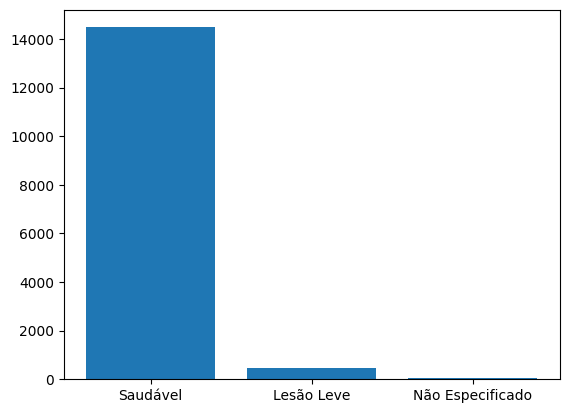

In [384]:
adocao_por_saude = df[["Health", "AdoptionSpeed"]].groupby("Health").count()
plt.bar(["Saudável", "Lesão Leve", "Não Especificado"], adocao_por_saude["AdoptionSpeed"])
# plt.hist(df["Health"])

# Comparando **Velocidade de Adição** e **Quantidade de Upload de Fotos**

In [391]:
adocao_por_fotos = df[["PhotoAmt", "AdoptionSpeed"]].groupby("AdoptionSpeed").mean()
adocao_por_fotos

,PhotoAmt
AdoptionSpeed,
0,3.324390
1,3.727184
2,4.071836
3,4.620743
4,3.319990


Não é legal aplicar regressão linear em dados categóricos

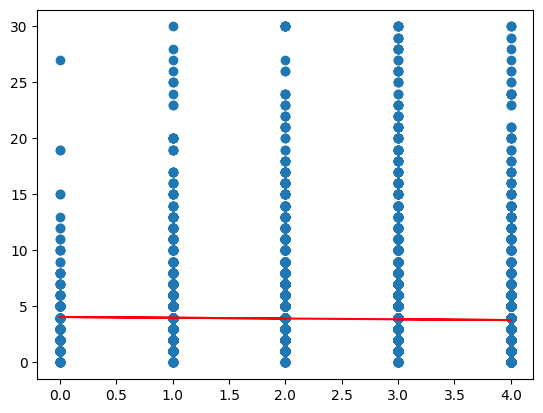

In [413]:
X = df["AdoptionSpeed"].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df["PhotoAmt"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
# plt.plot(x, y)

(array([[1.172e+03, 1.480e+03, 2.620e+02, 9.900e+01, 3.900e+01, 1.600e+01,
         1.200e+01, 2.000e+00, 5.000e+00, 3.000e+00],
        [3.090e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 2 BarContainer objects>)

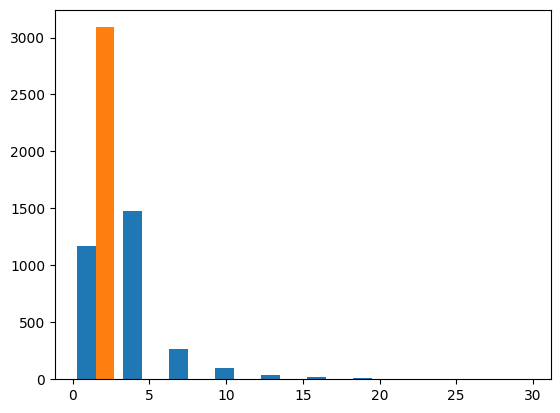

In [416]:
uma_semana = df[["PhotoAmt", "AdoptionSpeed"]].query("AdoptionSpeed == 1")
plt.hist(uma_semana)

(array([5934., 6539., 1367.,  605.,  261.,  116.,   63.,   37.,   33.,
          38.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

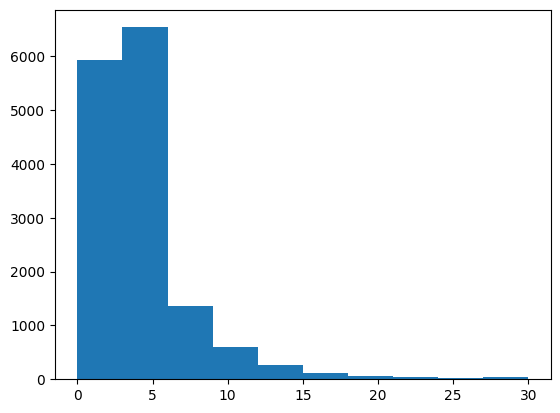

In [433]:
um_mes = df[["PhotoAmt", "AdoptionSpeed"]]
# um_mes = df[["PhotoAmt", "AdoptionSpeed"]].groupby("AdoptionSpeed").mean()
# plt.plot(um_mes)
plt.hist(df["PhotoAmt"])

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 19.],
        [16.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <a list of 2 BarContainer objects>)

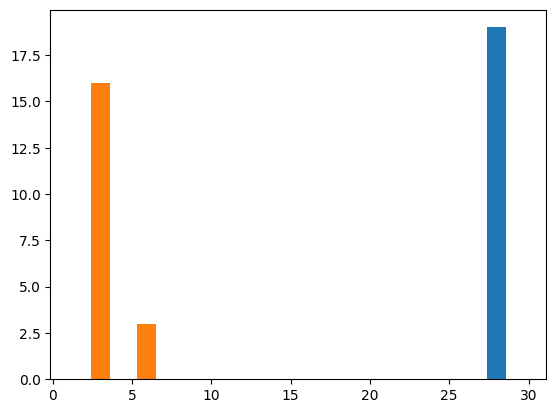

In [427]:
tres_meses = df[["PhotoAmt", "AdoptionSpeed"]].query("PhotoAmt == 30")
plt.hist(tres_meses)
# df["PhotoAmt"].max()